# Linear Algebra and Floating Point Arithmetic

## Direct methods for the solution of Linear Systems

can observe the condition value of different matrices and draw conclusions about them

In [1]:
# importing main libraries
import numpy as np
import scipy
import matplotlib.pyplot as plt 
from scipy.linalg import hilbert

 consider equation **A.x = b** to solve

### Random matrices:

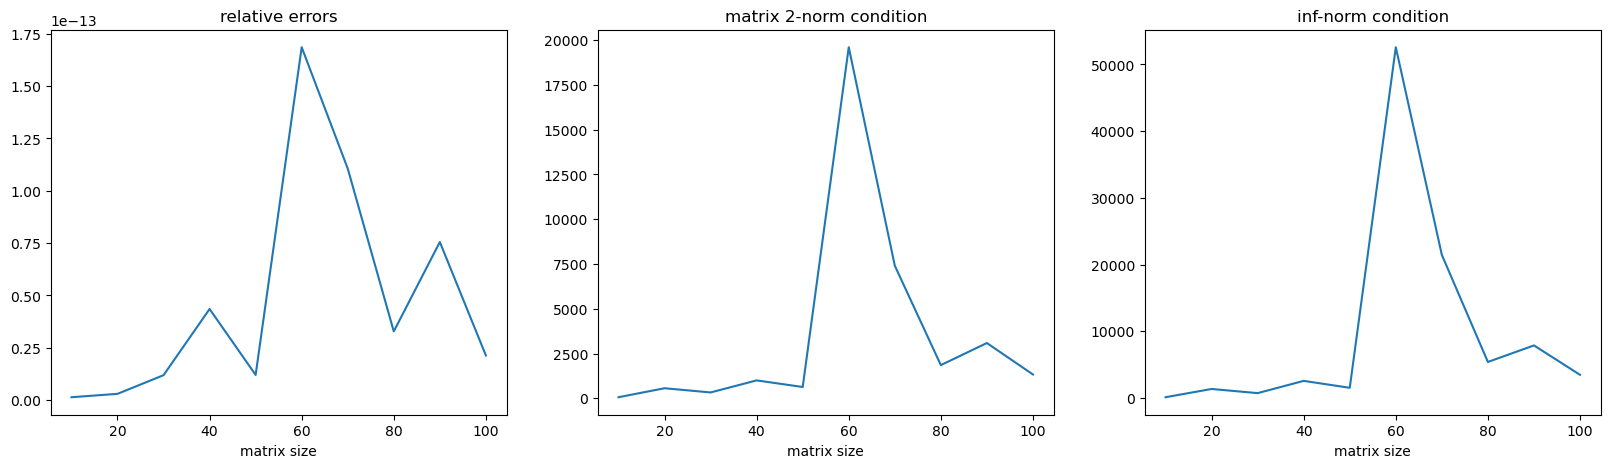

In [2]:
# set random seeds
np.random.seed(42)

size = np.linspace(10, 100, num = 10, dtype = np.int32)
errs = []
cond_nums = []
for n in size:
    A = np.random.rand(n,n)
    x_true =np.ones((n,1))
    b = A @ x_true
    
    norm_2 = np.linalg.cond(A, p = 2)
    norm_inf = np.linalg.cond(A, p = np.inf)
    cond_nums.append((norm_2, norm_inf))
    
    x_estimate = np.linalg.solve(A, b)
    relative_err = np.linalg.norm(x_true - x_estimate)/np.linalg.norm(x_true)
    errs.append(relative_err)
    
fig, axes = plt.subplots(1,3, figsize = (20,5))
axes[0].plot(size, errs)
axes[0].set_title("relative errors")
axes[0].set_xlabel("matrix size")

axes[1].plot(size, [x[0] for x in cond_nums])
axes[1].set_title("matrix 2-norm condition")
axes[1].set_xlabel("matrix size")

axes[2].plot(size, [x[1] for x in cond_nums])
axes[2].set_title("inf-norm condition")
axes[2].set_xlabel("matrix size")
plt.show()

### Vandermonde Matrices:

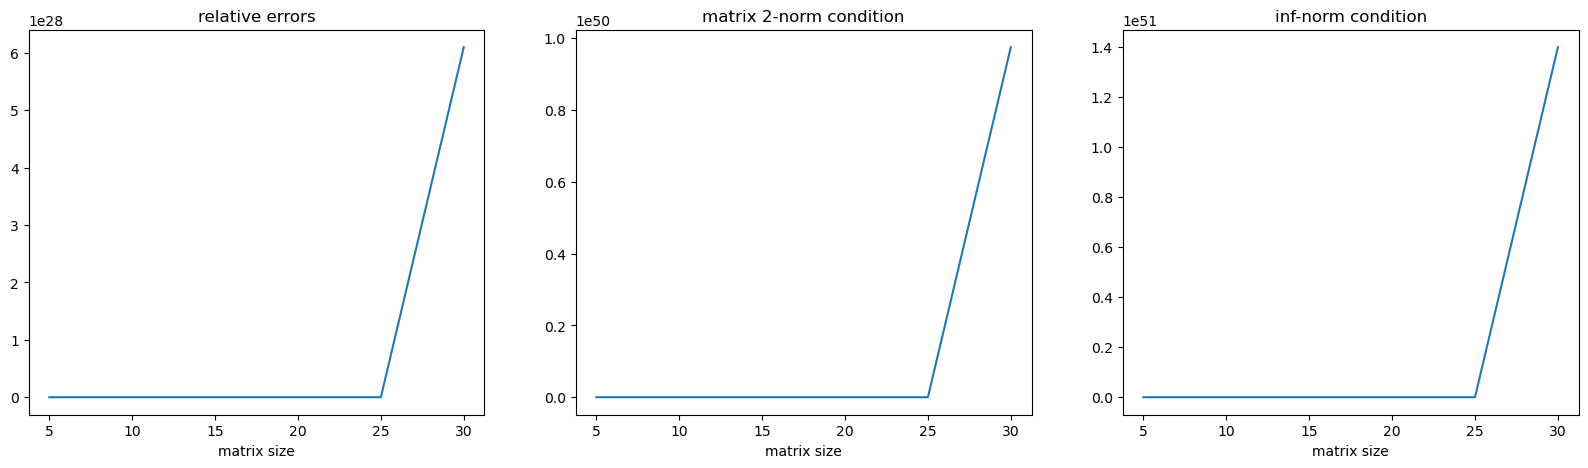

In [3]:
size = np.linspace(5, 30, num = 6, dtype = np.int32)
errs = []
cond_nums = []
for n in size:
    x_true = np.ones((n,1), dtype = np.float64)
    A= np.vander(np.linspace(1, n, n))
    b = A @ x_true
    
    norm_2 = np.linalg.cond(A)
    norm_inf = np.linalg.cond(A, p = np.inf)
    cond_nums.append((norm_2, norm_inf))
    
    x_estimate = np.linalg.solve(A, b)
    relative_err = np.linalg.norm(x_true - x_estimate)/np.linalg.norm(x_true)
    errs.append(relative_err)
    
fig, axes = plt.subplots(1,3, figsize = (20,5))
axes[0].plot(size, errs)
axes[0].set_title("relative errors")
axes[0].set_xlabel("matrix size")
# axes[0].set_yscale('log')

axes[1].plot(size, [x[0] for x in cond_nums])
axes[1].set_title("matrix 2-norm condition")
axes[1].set_xlabel("matrix size")
# axes[1].set_yscale('log')

axes[2].plot(size, [x[1] for x in cond_nums])
axes[2].set_title("inf-norm condition")
axes[2].set_xlabel("matrix size")
# axes[2].set_yscale('log')
plt.show()

### Hilbert Matrices:

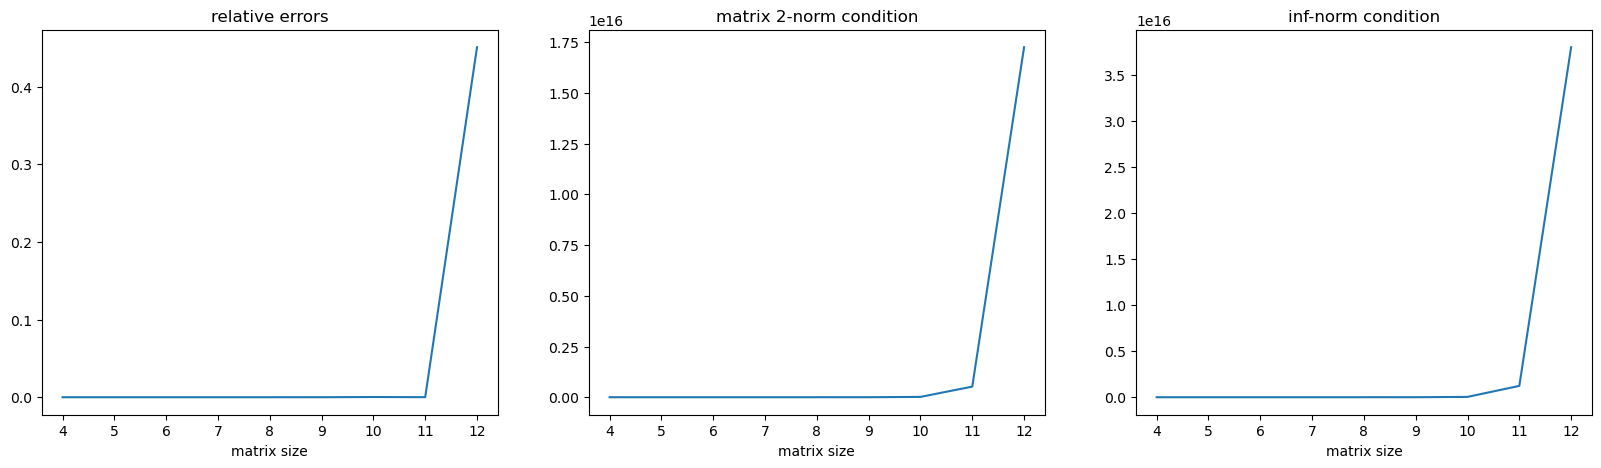

In [4]:
size = np.linspace(4, 12, num = 9, dtype = np.int32)
errs = []
cond_nums = []
for n in size:
    x_true = np.ones((n,1))
    A= hilbert(n)
    b = A @ x_true
    
    norm_2 = np.linalg.cond(A)
    norm_inf = np.linalg.cond(A, p = np.inf)
    cond_nums.append((norm_2, norm_inf))
    
    x_estimate = np.linalg.solve(A, b)
    relative_err = np.linalg.norm(x_true - x_estimate)/np.linalg.norm(x_true)
    errs.append(relative_err)
    
fig, axes = plt.subplots(1,3, figsize = (20,5))
axes[0].plot(size, errs)
axes[0].set_title("relative errors")
axes[0].set_xlabel("matrix size")
# axes[0].set_yscale('log')

axes[1].plot(size, [x[0] for x in cond_nums])
axes[1].set_title("matrix 2-norm condition")
axes[1].set_xlabel("matrix size")
# axes[1].set_yscale('log')

axes[2].plot(size, [x[1] for x in cond_nums])
axes[2].set_title("inf-norm condition")
axes[2].set_xlabel("matrix size")
# axes[2].set_yscale('log')
plt.show()

### Results
From the plots above it can conclude the results below:  

1- relative error and 2-norm and inf-norm condition are *related together* and behave the same  
2- looking at 2-norm and inf-norm condition we can see condition number (norms) have the *same magnitude*  
3- condition number is not affected by type of the norm  
4- for high condition number (norm) we have high relative error  
5- looking at condition number only we can't say if it is high or not. but considering relative error it is possible to say if it's      high or not.

##### Random:
although it has higher condition number in n=60, still the relative error is low so we can say it is not ill-conditioned.

##### Vandermonde:
condition number goes exponentially high with increasing the dimention (n) and the relative error is high so we can say it is ill-conditioned.

##### Hilbert:
condition number goes exponentially high with increasing the dimention (n), still the relative error don't get very high untill some dimention so we can say it is not ill-conditioned.

## Floating point Arithmetics

### calculating machine epsilon

In [5]:
epsilon = 1

while(1 + epsilon/2 > 1):
    epsilon /= 2

print(epsilon)

2.220446049250313e-16


### illustrating Euler constant for different n
$e = (1+\frac{1}{n})^n$

At n = [16] the estimation is equal to 1


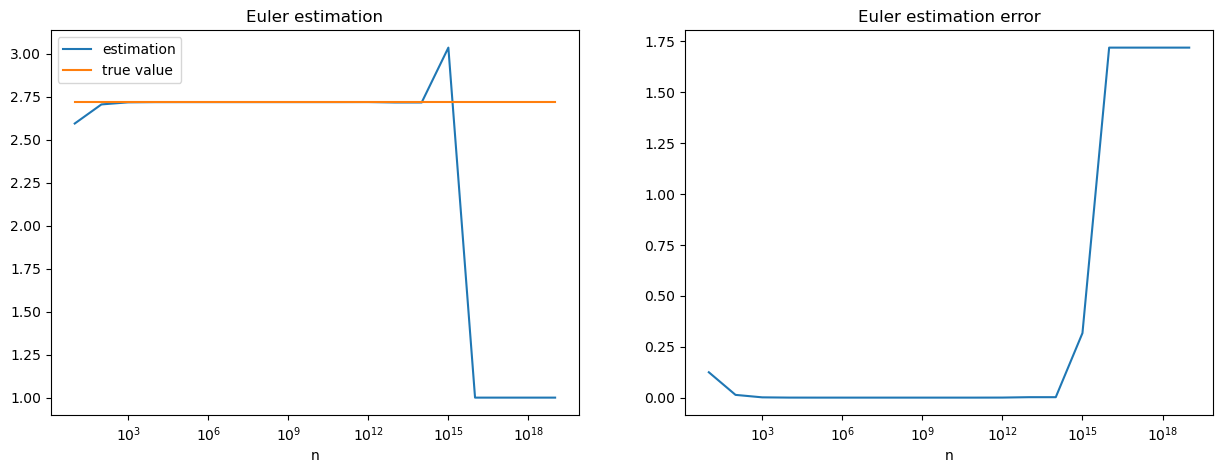

In [6]:
def euler_calc(n):
     return (1 + 1/n) ** n, np.abs(np.e - (1 + 1/n) ** n)

est = []
err = []
x = []

fig, axes = plt.subplots(1,2, figsize=(15,5))
for i in range(1,20):
    e_estimation, e_error = euler_calc(10 ** i)
    est.append(e_estimation)
    err.append(e_error)
    x.append(10 ** i)

axes[0].plot(x, est)
axes[0].plot(x, np.e*np.ones((len(x))))
axes[0].set_title('Euler estimation')
# axes[0].yscale('log')
axes[0].set_xscale('log')
axes[0].set_xlabel('n')
axes[0].legend(['estimation','true value'])

axes[1].plot(x, err)
axes[1].set_title('Euler estimation error')
# axes[1].yscale('log')
axes[1].set_xscale('log')
axes[1].set_xlabel('n')

# we add 1 to the np.argwhere (which gives index not the value) output to obtain the value of n
print(f'At n = {np.argwhere(np.array(est)==1)[0] + 1} the estimation is equal to 1')
plt.show()

### Plot behaviour explanation
after a certain n (n=16), the value of $\frac{1}{n} = 1e-16$ goes below the machine precision so it will be consider to 0. at this moment for any larger n the computer calculate the Euler estimation equal to one 

### relation between the eigenvalues and the full-rank condition

In [7]:
A = np.array([[4,2], [1,3]])
B = np.array([[4,2], [2,1]])
print("rank of A is : ", np.linalg.matrix_rank(A))
print("eigen values of A are: ",np.linalg.eigvals(A))

print("\nrank of B is : ", np.linalg.matrix_rank(B))
print("eigen values of B are: ",np.linalg.eigvals(B))

rank of A is :  2
eigen values of A are:  [5. 2.]

rank of B is :  1
eigen values of B are:  [5. 0.]


rank of a matrix is equal to the number of non-zero eigenvalues.  